1. Convert .txt file to .csv file.
2. Name the first column as Exam 1, second as Exam 2 and third column as admission. Consider 0 as not admitted and 1 as admitted.
3. Plot scatter graph between exam 1 and exam 2. The marker should be x for not admitted and + for admitted. 
4. Calculate Sigmoid Function.
5. Find the cost function.
6.Find the Gradient decent

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [23]:
df = pd.read_csv("university_admission.txt")
df.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [24]:
#convert to csv file
df.to_csv('my_file.csv')

In [25]:
df.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [26]:
df.columns = ['Exam1', 'Exam2','Admission']
df

,Exam1,Exam2,Admission
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
...,...,...,...
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1


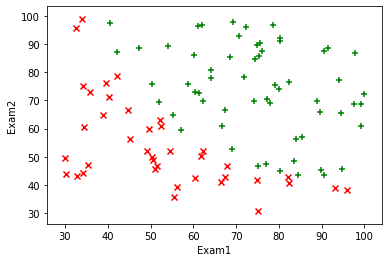

In [27]:
m1=df['Exam1'].tolist()
m2=df['Exam2'].tolist()
adm=df['Admission'].tolist()

for i in range(len(m1)):
    if adm[i]==0:
        plt.scatter(m1[i],m2[i],marker='x',color='red')
    else:
        plt.scatter(m1[i],m2[i],marker='+',color='green')
        
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

In [28]:
#calculate Sigmoid function
#s=1/(1+e(pw-(th0+th1x1)))

q0=q1=q2=0
for i in range(len(m1)):
    sig=1/(1+np.exp(-(q0+q1*m1[i]+q2*m2[i])))
    
print('sigmoid function value', sig)

sigmoid function value 0.5


In [11]:
# cost function

#J(th)=-1/m(sum i to m (y*log(h)+(1-y)log(1-h)))

cost=0
c=[]
m=len(m1)
for j in range(m):
    cost-=((1/m)*(adm[j]*np.log(sig)+(1-adm[j])*np.log(1-sig)))
    c.append(cost)
    
print(c)

[0.0070014866723226805, 0.014002973344645361, 0.02100446001696804, 0.028005946689290722, 0.0350074333616134, 0.04200892003393608, 0.04901040670625876, 0.05601189337858144, 0.06301338005090412, 0.0700148667232268, 0.07701635339554949, 0.08401784006787218, 0.09101932674019486, 0.09802081341251755, 0.10502230008484023, 0.11202378675716292, 0.1190252734294856, 0.12602676010180827, 0.13302824677413094, 0.1400297334464536, 0.14703122011877628, 0.15403270679109896, 0.16103419346342163, 0.1680356801357443, 0.17503716680806697, 0.18203865348038964, 0.1890401401527123, 0.19604162682503498, 0.20304311349735765, 0.21004460016968032, 0.217046086842003, 0.22404757351432567, 0.23104906018664834, 0.238050546858971, 0.24505203353129368, 0.2520535202036164, 0.2590550068759391, 0.2660564935482618, 0.2730579802205845, 0.28005946689290717, 0.28706095356522987, 0.29406244023755257, 0.30106392690987527, 0.30806541358219797, 0.31506690025452067, 0.32206838692684336, 0.32906987359916606, 0.33607136027148876, 0

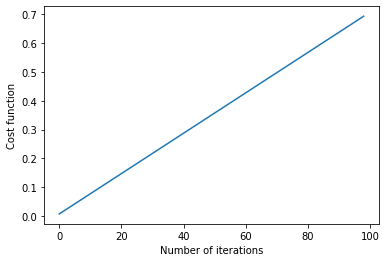

In [12]:
plt.plot(range(99),c)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.show()

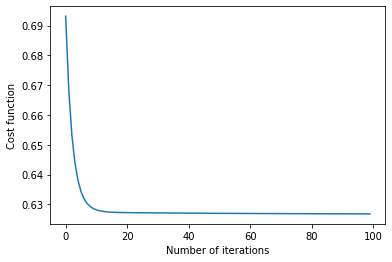

In [29]:
#Find the Cost Function and Gradient Decent
#GD=th-a*1/m (summation i to m(h*xi-yi))x
#J(th)=-1/m(sum i to m (y*log(h)+(1-y)log(1-h)))

Q0=Q1=Q2=0

a=0.0001
l=len(m1)
cost=[] #cost Function

for i in range (100):
    c=0
    for j in range(l):
        sig=1/(1+np.exp(-(Q0+Q1*m1[j]+Q2*m2[j])))
        c-=(adm[j]*np.log(sig)+(1-adm[j])*np.log(1-sig))
    c= (c/l)
    cost.append(c)
    
    gd1=0
    for k in range(l):
        gd1+=(1/(1+np.exp(-(Q0+Q1*m1[k]+Q2*m2[k])))-adm[k])
        
    Q0-=a*(gd1/l)
    
    gd2=0
    for k in range(l):
        gd2+=(1/(1+np.exp(-(Q0+Q1*m1[k]+Q2*m2[k])))-adm[k])*m1[k]
        
    Q1-=a*(gd2/l)
    
    gd3=0
    for k in range(l):
        gd3+=(1/(1+np.exp(-(Q0+Q1*m1[k]+Q2*m2[k])))-adm[k])*m2[k]
        
    Q2-=a*(gd3/l)
    

plt.plot(range(100),cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.show()  

In [30]:
print("The value of Q0,Q1 and Q2:", Q0,Q1,'and',Q2)

The value of Q0,Q1 and Q2: -0.0006092087958028584 0.007623853957695819 and 0.0035682915170456974


In [34]:
y=[]

for i in range(l):
    h=1/(1+np.exp(-(Q0+Q1*m1[i]+Q2*m2[i])))
    y.append(h)

avg=sum(y)/len(y)

M1=float(input("enter marks1:"))
M2=float(input("enter marks1:"))

s=1/(1+np.exp(-(Q0+Q1*M1+Q2*M2)))
if s>avg:
    print("Admitted")
else:
    print("Not Admitted")
    

enter marks1:78.9
enter marks1:78
Admitted
